In [1]:
import pandas as pd
import numpy as np

In [2]:
from pydataset import data
url = f'mysql+pymysql://{user}:{password}@{host}/{database}

# Exercises I

1. Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url connection string formatted like in the example at the start of this lesson.

In [4]:
def get_db_url(host, user, password, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [5]:
url = get_db_url(host, user, password, 'employees')

In [6]:
pd.read_sql('select * from employees limit 10', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


2. Use your function to obtain a connection to the employees database.

In [9]:
from env import host, user, password
db = 'employees'
url = get_db_url(host, user, password, 'employees')

In [10]:
pd.read_sql('select * from employees limit 10', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


3. Once you have successfully run a query:
    
    a. Intentionally make a typo in the database url. What kind of error message do you see?

In [11]:
url = get_db_url(host, user, password, 'employes')
pd.read_sql('select * from employees limit 10', url)

OperationalError: (pymysql.err.OperationalError) (1044, "Access denied for user 'florence03'@'%' to database 'employes'")
(Background on this error at: http://sqlalche.me/e/13/e3q8)

    b. Intentionally make an error in your SQL query. What does the error message look like?

In [12]:
url = get_db_url(host, user, password, 'employees')
pd.read_sql('select * from employee limit 10', url)

ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'employees.employee' doesn't exist")
[SQL: select * from employee limit 10]
(Background on this error at: http://sqlalche.me/e/13/f405)

4. Read the employees and titles tables into two separate DataFrames.

In [13]:
employees_df = pd.read_sql(
'''
SELECT * FROM employees
''',
url)

In [16]:
employees_df

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [14]:
titles_df = pd.read_sql(
'''
SELECT * FROM titles
''',
url)

In [17]:
titles_df

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


5. How many rows and columns do you have in each DataFrame? Is that what you expected?

In [18]:
employees_df.shape

(300024, 6)

In [19]:
titles_df.shape

(443308, 4)

6. Display the summary statistics for each DataFrame.

In [20]:
employees_df.describe

<bound method NDFrame.describe of         emp_no  birth_date first_name last_name gender   hire_date
0        10001  1953-09-02     Georgi   Facello      M  1986-06-26
1        10002  1964-06-02    Bezalel    Simmel      F  1985-11-21
2        10003  1959-12-03      Parto   Bamford      M  1986-08-28
3        10004  1954-05-01  Chirstian   Koblick      M  1986-12-01
4        10005  1955-01-21    Kyoichi  Maliniak      M  1989-09-12
...        ...         ...        ...       ...    ...         ...
300019  499995  1958-09-24     Dekang  Lichtner      F  1993-01-12
300020  499996  1953-03-07       Zito      Baaz      M  1990-09-27
300021  499997  1961-08-03    Berhard    Lenart      M  1986-04-21
300022  499998  1956-09-05   Patricia   Breugel      M  1993-10-13
300023  499999  1958-05-01     Sachin   Tsukuda      M  1997-11-30

[300024 rows x 6 columns]>

In [21]:
employees_df.describe(exclude = np.number)

,birth_date,first_name,last_name,gender,hire_date
count,300024,300024,300024,300024,300024
unique,4750,1275,1637,2,5434
top,1952-03-08,Shahab,Baba,M,1985-06-20
freq,95,295,226,179973,132


In [22]:
titles_df.describe

<bound method NDFrame.describe of         emp_no            title   from_date     to_date
0        10001  Senior Engineer  1986-06-26  9999-01-01
1        10002            Staff  1996-08-03  9999-01-01
2        10003  Senior Engineer  1995-12-03  9999-01-01
3        10004         Engineer  1986-12-01  1995-12-01
4        10004  Senior Engineer  1995-12-01  9999-01-01
...        ...              ...         ...         ...
443303  499997         Engineer  1987-08-30  1992-08-29
443304  499997  Senior Engineer  1992-08-29  9999-01-01
443305  499998     Senior Staff  1998-12-27  9999-01-01
443306  499998            Staff  1993-12-27  1998-12-27
443307  499999         Engineer  1997-11-30  9999-01-01

[443308 rows x 4 columns]>

In [23]:
titles_df.describe(exclude = np.number)

,title,from_date,to_date
count,443308,443308,443308
unique,7,6393,5888
top,Engineer,1998-10-25,9999-01-01
freq,115003,132,240124


7. How many unique titles are in the titles DataFrame?

In [24]:
#find unique values in the titles column
titles_df.title.unique()

#find type of this output - its a numpy array
type(titles_df.title.unique())

#use shape to figure out how many values are in there
titles_df.title.unique().shape

(7,)

8. What is the oldest date in the to_date column?

In [25]:
titles_df.to_date.sort_values().head(1)

16064    1985-03-01
Name: to_date, dtype: object

In [26]:
titles_df.to_date.min()

datetime.date(1985, 3, 1)

In [27]:
min(titles_df['to_date'])

datetime.date(1985, 3, 1)

9. What is the most recent date in the to_date column?

In [28]:
titles_df.to_date.max()

datetime.date(9999, 1, 1)

# Exercises II

1. Copy the users and roles DataFrames from the examples above.

In [29]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
print(users)

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

   id   name  role_id
0   1    bob      1.0
1   2    joe      2.0
2   3  sally      3.0
3   4   adam      3.0
4   5   jane      NaN
5   6   mike      NaN


,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


2. What is the result of using a right join on the DataFrames?

In [30]:
users.merge(roles, left_on='role_id', right_on='id', how='right', indicator=True)

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1,admin,both
1,2.0,joe,2.0,2,author,both
2,3.0,sally,3.0,3,reviewer,both
3,4.0,adam,3.0,3,reviewer,both
4,NaN,NaN,NaN,4,commenter,right_only


3. What is the result of using an outer join on the DataFrames?

In [31]:
users.merge(roles, left_on='role_id', right_on='id', how='outer', indicator=True)

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1.0,admin,both
1,2.0,joe,2.0,2.0,author,both
2,3.0,sally,3.0,3.0,reviewer,both
3,4.0,adam,3.0,3.0,reviewer,both
4,5.0,jane,NaN,NaN,NaN,left_only
5,6.0,mike,NaN,NaN,NaN,left_only
6,NaN,NaN,NaN,4.0,commenter,right_only


4. What happens if you drop the foreign keys from the DataFrames and try to merge them?

In [32]:
noforeignkey_users = users.drop(columns='role_id')
noforeignkey_users

pd.merge(noforeignkey_users, roles, on='id')

,id,name_x,name_y
0,1,bob,admin
1,2,joe,author
2,3,sally,reviewer
3,4,adam,commenter


In [33]:
users.merge(roles,how='outer')

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN
6,1,admin,NaN
7,2,author,NaN
8,3,reviewer,NaN
9,4,commenter,NaN


5. Load the mpg dataset from PyDataset.

In [34]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


6. Output and read the documentation for the mpg dataset.

In [35]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [49]:
data('mpg', show_doc = True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




7. How many rows and columns are in the dataset?

In [50]:
mpg_df.shape

(234, 14)

In [ ]:
234 rows, 11 columns

8. Check out your column names and perform any cleanup you may want on them.

In [38]:
mpg_df = mpg
mpg_df=mpg_df.rename(columns={'cty': 'city'})
mpg_df=mpg_df.rename(columns={'hwy': 'highway'})
mpg_df=mpg_df.rename(columns={'trans': 'transmission'})
mpg_df=mpg_df.rename(columns={'displ': 'displacement'})

mpg_df=mpg_df.rename(columns={'cty': 'city',
                               'hwy': 'highway',
                            'trans': 'transmission',
                            'displ': 'displacement'})

In [39]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
# mpg.columns.tolist()
# mpg.columns = ['manufacturer', 'model', 'displacement', 'year', 'cylinders', 'transmission', 'drive', 'city','highway', 'fuel', 'class']

9. Display the summary statistics for the dataset.

In [40]:
mpg_df.describe()

,displacement,year,cyl,city,highway
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


10. How many different manufacturers are there?

In [41]:
len(set(mpg_df['manufacturer']))

15

In [42]:
len(mpg_df.manufacturer.unique())

15

In [ ]:
# mpg.manufacturer.nunique()
# value_counts()  ????

11. How many different models are there?

In [43]:
len(mpg_df.model.unique())

38

12. Create a column named mileage_difference like you did in the DataFrames exercises; this column should contain the difference between highway and city mileage for each car.

In [44]:
mpg_df['mileage_difference'] = mpg_df.highway - mpg_df.city
mpg_df

,manufacturer,model,displacement,year,cyl,transmission,drv,city,highway,fl,class,mileage_difference
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8


13. Create a column named average_mileage like you did in the DataFrames exercises; this is the mean of the city and highway mileage.

In [45]:
mpg_df['average_mileage'] = (mpg_df.highway + mpg_df.city)/2
mpg_df

,manufacturer,model,displacement,year,cyl,transmission,drv,city,highway,fl,class,mileage_difference,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0


In [51]:
# OR alternate method using the mean function
mpg['average_mileage'] = mpg[['highway_mpg', 'city_mpg']].mean(axis = 1)

KeyError: "None of [Index(['highway_mpg', 'city_mpg'], dtype='object')] are in the [columns]"

14. Create a new column on the mpg dataset named is_automatic that holds boolean values denoting whether the car has an automatic transmission.

In [46]:
mpg_df['is_automatic'] = mpg_df.transmission.str.contains('auto')
#or
mpg_df['is_automatic'] = mpg_df.transmission.str.startswith('auto')
mpg_df

,manufacturer,model,displacement,year,cyl,transmission,drv,city,highway,fl,class,mileage_difference,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,9,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,8,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,10,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,8,22.0,False


In [ ]:
# Faith's way to do more than one column
# mpg = mpg.assign(mileage_difference = mpg.highway - mpg.city,
#                  average_mileage = (mpg.highway + mpg.city) / 2,
#                  is_automatic = mpg.transmission.str.startswith('a'))

15. Using the mpg dataset, find out which which manufacturer has the best miles per gallon on average?

In [47]:
mpg_df.groupby('manufacturer').average_mileage.mean().sort_values().nlargest(1, keep='all')

manufacturer
honda    28.5
Name: average_mileage, dtype: float64

16. Do automatic or manual cars have better miles per gallon?

In [48]:
mpg_df.groupby('is_automatic').average_mileage.mean()

is_automatic
False    22.227273
True     19.130573
Name: average_mileage, dtype: float64

# Exercise III

1. Use your get_db_url function to help you explore the data from the chipotle database.

In [53]:
url = get_db_url(host, user, password, 'chipotle')
pd.read_sql('SELECT * FROM orders LIMIT 5', url)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [54]:
chipotle_df = pd.read_sql('SELECT * FROM orders', url)

2. What is the total price for each order?
#2 order_totals = orders.groupby('order_id').item_price.sum()

In [55]:
chipotle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [56]:
chipotle_df['item_price'] = chipotle_df['item_price'].str.replace('$', '').astype(float)

In [57]:
order_total_prices = chipotle_df.groupby('order_id').item_price.sum()
order_total_prices

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

3. What are the most popular 3 items?

In [58]:
chipotle_df['item_name'].value_counts().head(3)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Name: item_name, dtype: int64

4. Which item has produced the most revenue?

In [59]:
chipotle_df.groupby('item_name').item_price.sum().nlargest(1)

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

5. Using the titles DataFrame, visualize the number of employees with each title.

In [60]:
titles_df['title'].value_counts()

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

<AxesSubplot:title={'center':'Title number breakdown'}, xlabel='Job Title', ylabel='Title Count'>

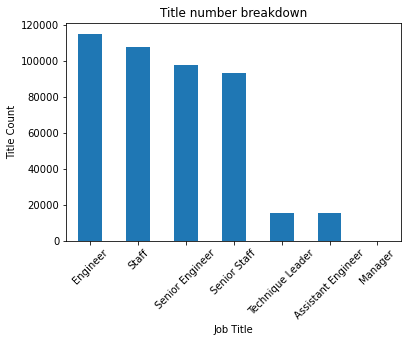

In [61]:
titles_df['title'].value_counts().plot.bar(rot = 45, title = 'Title number breakdown', xlabel = "Job Title", ylabel = 'Title Count')

6. Join the employees and titles DataFrames together.

In [62]:
employees_titles_df = employees_df.merge(titles_df, how = 'inner', on = 'emp_no')
employees_titles_df.head(20)

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
5,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Senior Staff,1996-09-12,9999-01-01
6,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Staff,1989-09-12,1996-09-12
7,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,Senior Engineer,1990-08-05,9999-01-01
8,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,Senior Staff,1996-02-11,9999-01-01
9,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,Staff,1989-02-10,1996-02-11


7. Visualize how frequently employees change titles.

In [63]:
titlescounts = employees_titles_df.groupby('emp_no').title.count()

<AxesSubplot:xlabel='Number of Jobs Held by a Single Employee', ylabel='Number of employees'>

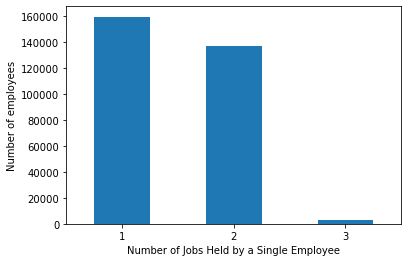

In [64]:
titlescounts.value_counts().plot.bar(rot = 0, xlabel = 'Number of Jobs Held by a Single Employee', ylabel = 'Number of employees')

8. For each title, find the hire date of the employee that was hired most recently with that title.

In [65]:
employees_titles_df.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

9. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL code to pull the necessary data and python/pandas code to perform the manipulations.)

In [68]:
empurl = get_db_url(host, user, password, 'employees')

In [70]:
title_count_df = pd.read_sql(
    '''
    SELECT 
    d.dept_name AS dept_name, 
    t.title AS title
    FROM titles AS t
    JOIN `dept_emp` AS de USING (emp_no)
    JOIN `departments` AS d ON d.`dept_no` = de.`dept_no`
    ORDER BY d.dept_name, t.title;
    ''', empurl)

In [71]:
pd.crosstab(title_count_df.dept_name, title_count_df.title, margins = True)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader,All
dept_name,,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309,35075
Development,7769,58135,2,49326,1247,1424,7683,125586
Finance,0,0,2,0,12139,13929,0,26070
Human Resources,0,0,2,0,12274,14342,0,26618
Marketing,0,0,2,0,13940,16196,0,30138
Production,6445,49649,4,42205,1270,1478,6557,107608
Quality Management,1831,13852,4,11864,0,0,1795,29346
Research,378,2986,2,2570,11637,13495,393,31461
Sales,0,0,2,0,36191,41808,0,78001


In [72]:
pd.crosstab(title_count_df.dept_name, title_count_df.title, normalize = True, margins = True).round(4)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader,All
dept_name,,,,,,,,
Customer Service,0.0006,0.0048,0.0,0.0041,0.0284,0.0330,0.0006,0.0716
Development,0.0159,0.1187,0.0,0.1007,0.0025,0.0029,0.0157,0.2563
Finance,0.0000,0.0000,0.0,0.0000,0.0248,0.0284,0.0000,0.0532
Human Resources,0.0000,0.0000,0.0,0.0000,0.0251,0.0293,0.0000,0.0543
Marketing,0.0000,0.0000,0.0,0.0000,0.0285,0.0331,0.0000,0.0615
Production,0.0132,0.1013,0.0,0.0861,0.0026,0.0030,0.0134,0.2197
Quality Management,0.0037,0.0283,0.0,0.0242,0.0000,0.0000,0.0037,0.0599
Research,0.0008,0.0061,0.0,0.0052,0.0238,0.0275,0.0008,0.0642
Sales,0.0000,0.0000,0.0,0.0000,0.0739,0.0853,0.0000,0.1592
